# Deep Learning Theoretical Aspects - Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is inherited in activation functions.  
Show that a network of N layers that uses a linear activation function can be reduced into a network with just an input and output layers.


# Answer
* Let's look at layer number 1, the first layer after the input layer. each node in layer number 1 is a linear combination of the input nodes and a bias term. Since the activation function applied on each node of layer 1 is linear, the values after activation will still be linear combinations of the input nodes.
* Now the neurons in layer number 2 will be a linear combination of the activated neurons from layer number 1, i.e a linear combination of a linear combination of the input, which is still a linear combination of the input.
* Using induction, this process can be continued untill layer N-1, and a combination of it's output will serve as the output of the network, meaning that the output neuron will be a linear combination of the input neurons.

### Derivatives of Activation Functions
Compute the derivative of these activation functions:

1 Sigmoid
<img src="https://cdn-images-1.medium.com/max/1200/1*Vo7UFksa_8Ne5HcfEzHNWQ.png" width="150">

Answer:

$$\frac{d}{dx}\left(\frac{1}{1+e^{-t}}\right)= \frac{d}{dt}\left(\left(1+e^{-t}\right)^{-1}\right)  =  -\frac{1}{\left(1+e^{-t}\right)^2}\frac{d}{dt}\left(1+e^{-t}\right) $$

$$=-\frac{1}{\left(1+e^{-t}\right)^2}\left(-e^{-t}\right) =\frac{e^{-t}}{\left(1+e^{-t}\right)^2}$$

2 Relu 

<img src="https://cloud.githubusercontent.com/assets/14886380/22743194/73ca0834-ee54-11e6-903f-a7efd247406b.png" width="200">

Answer: Relu function has no derivative

3 Softmax
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e348290cf48ddbb6e9a6ef4e39363568b67c09d3" width="250">

Answer:

 \begin{array}{l}
\frac{\partial \sigma ( Z)_{i}}{\partial Z_{j}} \ =\ \sigma ( Z)_{j} \times ( 1-\sigma ( Z)_{j}) \ ,\ i=j\ \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ -\sigma ( Z)_{i} \ \times \ \sigma ( Z)_{j} \ \ \ \ \ \ ,\ i\ \neq j\\
\end{array}

### Back Propagation
Use the delta rule and backprop to compute the derivatives for these computations:

$$ z =x_1\:+\:5\cdot x_2\:-\:3\cdot x_3^2 $$

$$ \frac{\partial z}{\partial x_1} = 1$$

$$ \frac{\partial z}{\partial x_2} = 5$$

$$ \frac{\partial z}{\partial x_3} = 6x_3$$

```
z = x1*(x2-4) + exp(x3^2) / 5*x4^2
```

$$z = x_1\cdot \left(x_2-4\right)\:+\:\frac{exp\left(x_3^2\right)}{5\cdot \:\:x_4^2}$$

$$ \frac{\partial z}{\partial x_1} = x_2-4 $$

$$ \frac{\partial z}{\partial x_2} = x_1$$

$$ \frac{\partial z}{\partial x_3} = \frac{2e^{x_3^2}z}{5x_4^2}$$

$$ \frac{\partial z}{\partial x_4} = -\frac{2e^{x_3^2}}{5x_4^3}$$

```
z = 1/x3 + exp( (x1+5*(x2+3)) ^2 )
```

$$ z = \frac{1}{x_3}\:+\:exp\left(\:\left(x_1+5\cdot \left(x_2+3\right)\right)\:^2\:\right) $$

$$ \frac{\partial z}{\partial x_1} = 2e^{\left(x_1+5\left(x_2+3\right)\right)^2}\left(x_1+5\left(x_2+3\right)\right)$$

$$ \frac{\partial z}{\partial x_2} = 10e^{\left(x_1+5\left(x_2+3\right)\right)^2}\left(x_1+5\left(x_2+3\right)\right)$$

$$ \frac{\partial z}{\partial x_3} = -\frac{1}{x_3^2}$$

#### Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error.  
We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:


<img src="http://ufldl.stanford.edu/wiki/images/math/a/2/3/a23bea0ab48ded7b9a979b68f6356613.png" width="250">

We'll numerically approximate it using:

<img src="http://ufldl.stanford.edu/wiki/images/math/4/8/a/48a000aed96c8595fcca2a45f48343ce.png" width="250">

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

In [33]:
import numpy as np

def approx_gradient(j, theta, epsilon=1e-7):
    
    j_num_of_args = j.__code__.co_argcount
    
    rand_x = np.random.randint(0, j_num_of_args)
    
    thetaplus = theta.copy()
    thetaplus[rand_x] += epsilon
    
    thetaminus = theta.copy()
    thetaminus[rand_x] -= epsilon
    
    J_plus = j(*thetaplus)
                
    J_minus = j(*thetaminus)
    
    gradapprox = (J_plus - J_minus) / (2 * epsilon)
        
    return gradapprox

thetas = [10,2,3]

def j_1(x,y,z):
    return x + 5*y - 3*z**2

def j_1_d_z(x,y,z):
    return 6*z

print(approx_gradient(j_1,thetas))
print(j_1_d_z(*thetas))

-17.999999979423364
18


### Puppy or bagel?
We've seen in class the (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.). 

Let's say you were asked by someone to find more examples like that. You are able to call the 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for the 1000 classes).  

Describe methods that might assist you in finding more examples.

Answer: One can look into vectors of the predictions and check for similarity across classes (i.e Cosine Similarity)

### Sample convolutions
Consider the following convolution filters:
```python
k1 = [ [0 0 0], [0 1 0], [0 0 0] ]
k2 = [ [0 0 0], [0 0 1], [0 0 0] ]
k3 = [ [-1-1 -1], [-1 8 -1], [-1 -1 -1] ]
k4 = [ [1 1 1], [1 1 1], [1 1 1] ] / 9
```

Can you guess what each of them computes?

#### Apply to arrays
Apply the convolutions above to the following array:


In [7]:
import numpy as np

k1 = np.array([[0,0,0], 
               [0,1,0], 
               [0,0,0]])

k2 = np.array([[0,0,0], 
               [0,0,1], 
               [0,0,0]])

k3 = np.array([[-1,-1,-1], 
               [-1,8,-1], 
               [-1,-1,-1]])

k4 = np.array([[1,1,1], 
               [1,1,1], 
               [1,1,1]]) / 9

In [8]:
x = np.array([[-1, -3, -4,  0, -1],
              [ 2, -2, -4,  0, -2],
              [-3, -2,  2,  2,  3],
              [ 0, -3, -4, -4, -2],
              [-4, -2,  2,  0,  1]])

In [9]:
from scipy import ndimage

for k in [k1,k2,k3,k4]:
    print(f'filter: {k}')
    print(ndimage.convolve(x, k, mode='constant', cval=0.0))

filter: [[0 0 0]
 [0 1 0]
 [0 0 0]]
[[-1 -3 -4  0 -1]
 [ 2 -2 -4  0 -2]
 [-3 -2  2  2  3]
 [ 0 -3 -4 -4 -2]
 [-4 -2  2  0  1]]
filter: [[0 0 0]
 [0 0 1]
 [0 0 0]]
[[ 0 -1 -3 -4  0]
 [ 0  2 -2 -4  0]
 [ 0 -3 -2  2  2]
 [ 0  0 -3 -4 -4]
 [ 0 -4 -2  2  0]]
filter: [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]
[[ -5 -15 -23  11  -6]
 [ 27  -3 -25   4 -20]
 [-19  -4  33  27  30]
 [ 14 -13 -27 -36 -18]
 [-27  -7  29   7  14]]
filter: [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[ 0 -1 -1 -1  0]
 [ 0 -1 -1  0  0]
 [ 0 -1 -1  0  0]
 [-1 -1 -1  0  0]
 [ 0 -1 -1  0  0]]


#### Apply to images
Apply the convolution filters above on the image. Plot the results:

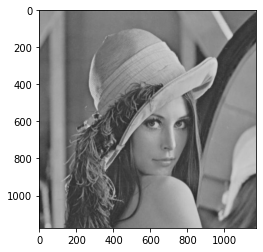

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
im = mpimg.imread('lena.jpg')
plt.imshow(im)

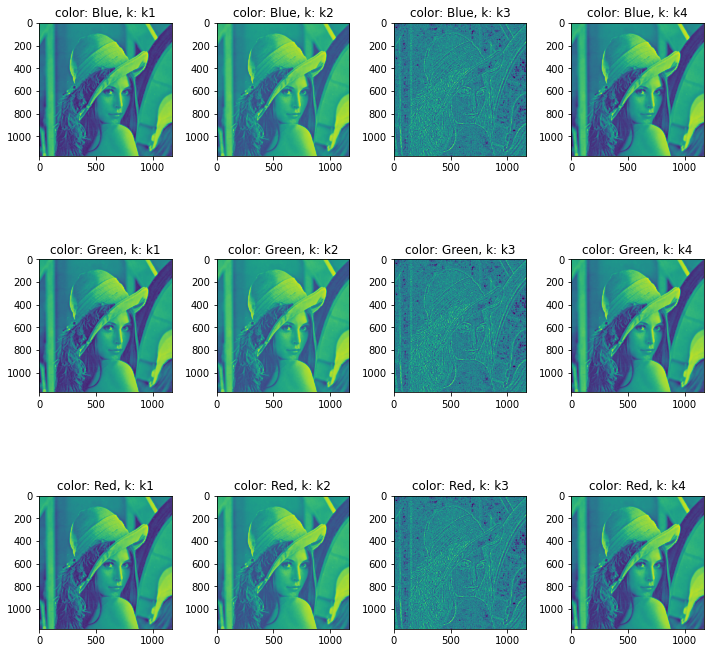

In [11]:
fig, axs = plt.subplots(3, 4)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.tight_layout()

b, g, r = im[:, :, 0], im[:, :, 1], im[:, :, 2]
for dim, color, horiz_loc in zip([b, g, r],['Blue','Green','Red'],[0,1,2]):
    for k_filter,k_name,ver_loc in zip([k1,k2,k3,k4],['k1','k2','k3','k4'],[0,1,2,3]):                       
        axs[horiz_loc,ver_loc].imshow(ndimage.filters.convolve(dim, k_filter, mode='constant', cval=0.0))
        axs[horiz_loc,ver_loc].set_title(f'color: {color}, k: {k_name}')

In [13]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

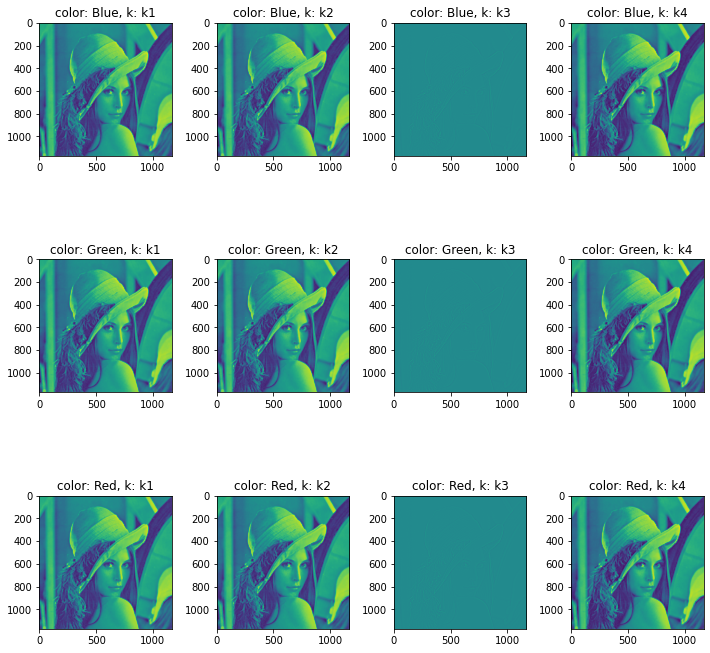

In [14]:
fig, axs = plt.subplots(3, 4)
fig.set_figheight(10)
fig.set_figwidth(10)
plt.tight_layout()

b, g, r = im[:, :, 0], im[:, :, 1], im[:, :, 2]
for dim, color, horiz_loc in zip([b, g, r],['Blue','Green','Red'],[0,1,2]):
    for k_filter,k_name,ver_loc in zip([k1,k2,k3,k4],['k1','k2','k3','k4'],[0,1,2,3]):                       
        axs[horiz_loc,ver_loc].imshow(convolve2D(dim, k_filter))
        axs[horiz_loc,ver_loc].set_title(f'color: {color}, k: {k_name}')

## Following Week 3
**(Note: We'll learn the material needed to complete this section on Week 3)**

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

## Answer: 
* For image of (1175, 1170, 3), and one kernel of (3,3)
1. (1173, 1168, 3)  
2. (587, 584, 3)  
3. (1175, 1170, 3)  
4. (588, 585, 3)

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

 \begin{array}{l}
o\ =\ \frac{i-k+2p}{s} \ +\ 1\\
where:\\
o\ =\ output\ dimension\\
i\ =\ input\ dimension\\
k\ =\ kernel\ dimension\\
p\ =\ padding\ size\\
s\ =\ stride\ size
\end{array}

* Note that the above formulae should be computed for each channel/band
* Note that if the input, kernel, padding or strides are not equal for the height and width dimensions, they should be computed differentely for each dimension.

### Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


* Input: images of dimension (28, 28)
* conv 1: dimension (24, 24, 32), number of parameters: (5 * 5 + 1) * 32 = 832
* maxpool 1: dimension (12, 12, 32), number of parameters: 0
* conv 2: dimension (8, 8, 64), number of parameters: (32 * 5 * 5 + 1) * 64 = 51,264
* maxpool 2: dimension (4, 4, 64), number of parameters: 0
* dense 1: dimension 1024, number of parameters: (4 * 4 * 64 + 1) * 1024 = 1,049,600
* dense 2: dimension 10, number of parameters: (1024 + 1) * 10 = 10,250